# DWCmod - dropwise condensation modeling
A simple python implementation of thermodynamic models for dropwise condensation. 

In [18]:
import DWC_plotting as DWC                    # import plotting functions

## Input Parameters
Defining the input parameters for the calculation. Please refer to the [CoolProp documentation](http://www.coolprop.org/fluid_properties/PurePseudoPure.html#list-of-fluids) for a list of supported fluids.

In [19]:
inputParameters = {"medium":"Water",          # choose the condensing fluid
                  "p_steam":337.8,            # pressure in mbar
                  "deltaT_sub":5,             # surface subcooling temperature in K
                  "Theta":90,                 # contact angle in deg
                  "CAH":10,                   # contact angle hysteresis in deg
                  "k_coat":0.2,               # thermal conductivity of the coating in W/(mK)
                  "delta_coat":0.000001,      # thickness of the coating in m
                  "h_i":15.7,                 # interfacial heat transfer coefficient in MW/m²K, if no value is given, h_i is calculated
                  "c":1,                      # numerical constant, "depends on the shape of the drop and on the steepness of the substrate surface" 
                  "N_s":250}                  # number of Nucleation sites in 10^9 1/m² 

## Plotting
You can plot the heat flux vs. the surface subcooling temperature:

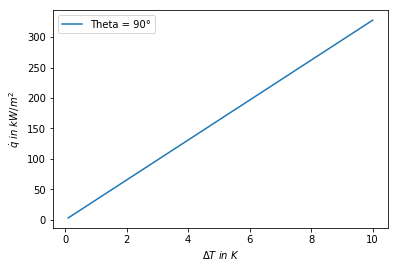

In [20]:
fig = DWC.plot_q_deltaTsub(inputParameters)

For a simple parameter variation, this function also takes some optional arguments: 

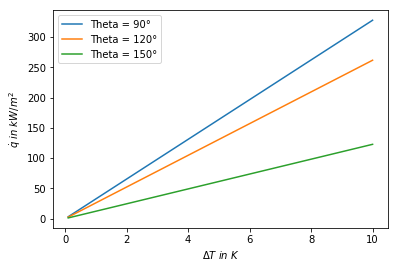

In [21]:
fig = DWC.plot_q_deltaTsub(inputParameters, theta=[90, 120, 150])  # plotting q vs. delta T for different contact angles

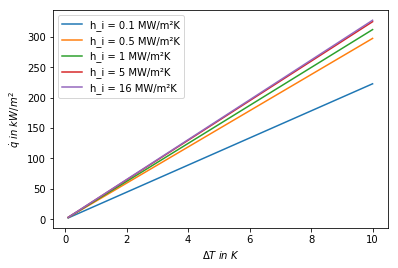

In [22]:
fig = DWC.plot_q_deltaTsub(inputParameters, h_i=[0.1, 0.5, 1, 5, 16])  # plotting q vs. delta T for different interfacial heat transfer coefficients

You can also plot the rate of heat flow and the heat flux through a single droplet...

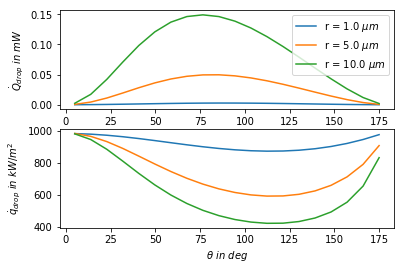

In [23]:
fig = DWC.plot_qdrop_theta_r(inputParameters, radii = [0.000001, 0.000005, 0.000010])

... and the drop size distribution:

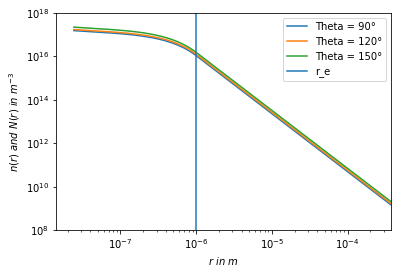

In [24]:
fig = DWC.plot_Nr_r(inputParameters, theta = [90, 120, 150])

The calculated results can be printed directly like this:

In [25]:
DWC.print_results(inputParameters)


fluid properties:
fluid: 	 Water
T_sat: 	 71.84774592128895 °C
sigma: 	 64.20573774100335 mN/m
h_fg: 	 2328.439485181256 kJ/kg
rho_l:	 976.6705040387072 kg/m³
rho_g:	 0.2137643354220767 kg/m³
R_s:	 461.52295930318655 J/(kg*K)

interfacial heat transfer coefficient:
h_i: 	  15700000.0 W/m²K
h_i_calc: 6717136.6 W/m²K

results:
q:	 163729.00061053934 W/m²
q_n:	 22174.572734600122 W/m²
q_N:	 141554.4278759392 W/m²
q_N/q:	 86.5 %
r_min:	 3.8961625003973076e-09 m
r_e:	 1e-06 m
r_max:	 0.0010561535753410094 m

model used:  KimKim2011
